In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time, sys

In [14]:
%matplotlib inline                  

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


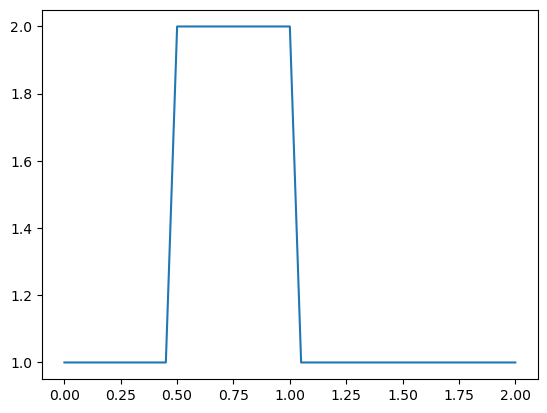

In [15]:
# Define the domain
nx = 41
dx = 2 / (nx - 1)
nt = 25
dt = 0.025
c = 1

u = np.ones(nx)

#u = np.sin(np.linspace(0, 2 * np.pi, nx))

u[int(0.5 / dx) : int(1 / dx + 1)] = 2
print(u)

# plt.plot(np.linspace(0, 2, nx), u)
# plt.show()
# plt.close()

un = np.ones(nx)
plt.plot(np.linspace(0, 2, nx), u)

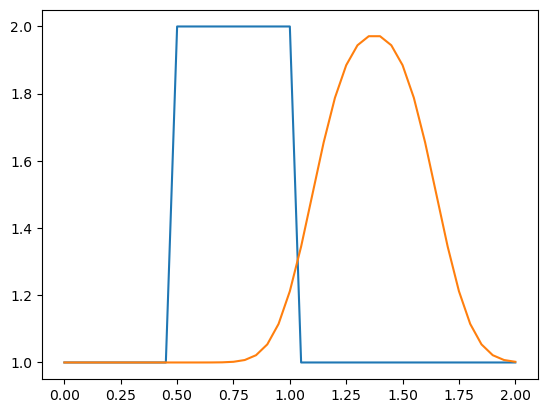

In [16]:
plt.plot(np.linspace(0, 2, nx), u)
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])

plt.plot(np.linspace(0, 2, nx), u)



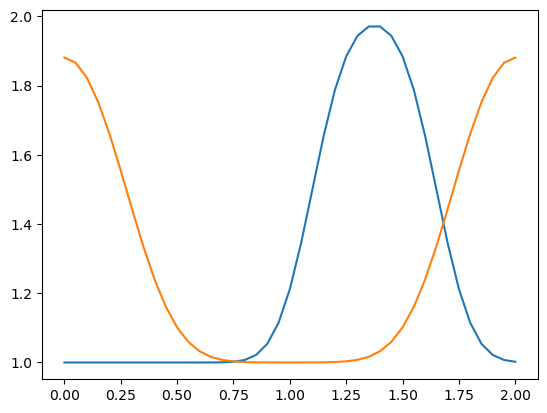

In [17]:
plt.plot(np.linspace(0, 2, nx), u)
for n in range(nt):
    un = u.copy()
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
    u[0] = u[-1] #Periodic BCs
plt.plot(np.linspace(0, 2, nx), u)


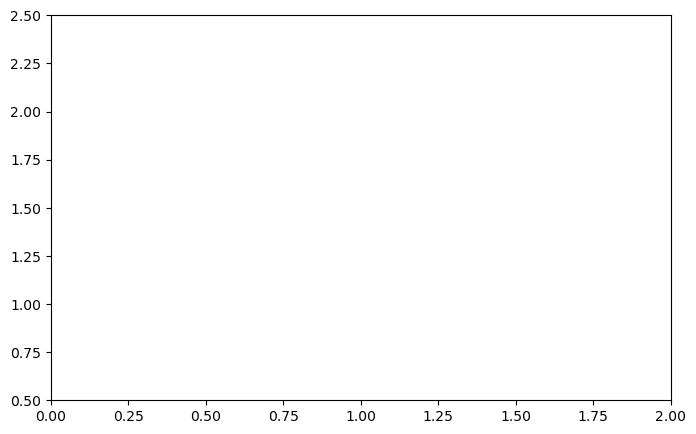

In [19]:
#Create animation
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(xlim=(0, 2), ylim=(0.5, 2.5))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    x = np.linspace(0, 2, nx)
    y = u
    line.set_data(x, y)
    u[0] = u[-1] #Periodic BCs
    for i in range(1, nx):
        u[i] = un[i] - c * dt / dx * (un[i] - un[i - 1])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=nt, interval=25)
HTML(anim.to_html5_video())


